In [207]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [160]:
df1 = pd.read_csv('aux_prueba.csv')
df2 = pd.read_csv('sample_para_dashboard_prueba.csv')
df1.shape

(23, 3)

In [161]:
print(df2.shape)
df2.head()

(100, 4)


,Unnamed: 0.1,Unnamed: 0,tweet,sentiment
0,162123,162123,im the only ho that didnt go to tigerheat tonite,0.0
1,637437,637437,@FashionGuru nooooooooooooo! I wanted to see t...,0.0
2,120695,120695,I can't believe i'm still awake! It's making m...,0.0
3,2058177,2058177,lunching and tweeting hate being at work when ...,0.0
4,503629,503629,shouldn't be talking to him,0.0


In [162]:
df = pd.concat((df1,df2),axis=1) #solo para hacer pruebas

In [163]:
df.head()

,Unnamed: 0,0,1,Unnamed: 0.1,Unnamed: 0,tweet,sentiment
0,0.0,Wed Oct 09 14:28:47 +0000 2024,Vendo 2 entradas VIP para ver a Vanessa Valero...,162123,162123,im the only ho that didnt go to tigerheat tonite,0.0
1,1.0,Wed Oct 09 14:28:46 +0000 2024,@todoesmentiratv La PREGUNTA es ¿quién debe re...,637437,637437,@FashionGuru nooooooooooooo! I wanted to see t...,0.0
2,2.0,Thu Sep 19 01:00:00 +0000 2024,Celebrate Prof. Oscar Garcia-Prada's 60th birt...,120695,120695,I can't believe i'm still awake! It's making m...,0.0
3,3.0,Wed Oct 09 14:28:46 +0000 2024,@maguire_utd1 He fit to play Madrid,2058177,2058177,lunching and tweeting hate being at work when ...,0.0
4,4.0,Wed Oct 09 14:28:45 +0000 2024,@theMadridZone @CH14_ Man United gave Real Mad...,503629,503629,shouldn't be talking to him,0.0


In [164]:
df.columns

Index(['Unnamed: 0', '0', '1', 'Unnamed: 0.1', 'Unnamed: 0', 'tweet',
       'sentiment'],
      dtype='object')

In [165]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0', 'Unnamed: 0', '1'],axis=1)



In [166]:
df.rename(columns={'0':'Date'},inplace=True)
df

,Date,tweet,sentiment
0,Wed Oct 09 14:28:47 +0000 2024,im the only ho that didnt go to tigerheat tonite,0.0
1,Wed Oct 09 14:28:46 +0000 2024,@FashionGuru nooooooooooooo! I wanted to see t...,0.0
2,Thu Sep 19 01:00:00 +0000 2024,I can't believe i'm still awake! It's making m...,0.0
3,Wed Oct 09 14:28:46 +0000 2024,lunching and tweeting hate being at work when ...,0.0
4,Wed Oct 09 14:28:45 +0000 2024,shouldn't be talking to him,0.0
...,...,...,...
95,NaN,i completely adored away we go,1.0
96,NaN,@goodlaura I apply the same logic to my parent...,1.0
97,NaN,your song battlefield is addicting i really ca...,1.0
98,NaN,I want sunnn,0.0


In [167]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Date'] = df['Date'].dt.date
df.head()

C:\Program Files\KMSpico\temp\ipykernel_18644\753804610.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Date,tweet,sentiment,Year,Month
0,2024-10-09,im the only ho that didnt go to tigerheat tonite,0.0,2024.0,10.0
1,2024-10-09,@FashionGuru nooooooooooooo! I wanted to see t...,0.0,2024.0,10.0
2,2024-09-19,I can't believe i'm still awake! It's making m...,0.0,2024.0,9.0
3,2024-10-09,lunching and tweeting hate being at work when ...,0.0,2024.0,10.0
4,2024-10-09,shouldn't be talking to him,0.0,2024.0,10.0


In [168]:
df.shape

(100, 5)

In [169]:

# Supongamos que 'df' es tu DataFrame con una columna 'Date'

# Convertir la columna 'Date' a datetime, asignando NaT a valores no convertibles
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convertir las fechas a un formato numérico (timestamp)
df['Date_numeric'] = df['Date'].apply(lambda x: x.timestamp() if pd.notna(x) else None)

# Aplicar el KNNImputer en la nueva columna numérica
imputer = KNNImputer(n_neighbors=2)
df['Date_numeric'] = imputer.fit_transform(df[['Date_numeric']])

# Convertir de nuevo los timestamps imputados a fechas
df['Date'] = pd.to_datetime(df['Date_numeric'], unit='s')

# Ver el DataFrame resultante
print(df[['Date']])


                            Date
0  2024-10-09 00:00:00.000000000
1  2024-10-09 00:00:00.000000000
2  2024-09-19 00:00:00.000000000
3  2024-10-09 00:00:00.000000000
4  2024-10-09 00:00:00.000000000
..                           ...
95 2024-10-07 10:26:05.217391253
96 2024-10-07 10:26:05.217391253
97 2024-10-07 10:26:05.217391253
98 2024-10-07 10:26:05.217391253
99 2024-10-07 10:26:05.217391253

[100 rows x 1 columns]


In [172]:
df.drop('Date_numeric',axis=1,inplace=True)
df

In [179]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Date'] = df['Date'].dt.date
df.head()

,Date,tweet,sentiment,Year,Month,words_count
0,2024-10-09,im the only ho that didnt go to tigerheat tonite,0.0,2024,10,10
1,2024-10-09,@FashionGuru nooooooooooooo! I wanted to see t...,0.0,2024,10,19
2,2024-09-19,I can't believe i'm still awake! It's making m...,0.0,2024,9,10
3,2024-10-09,lunching and tweeting hate being at work when ...,0.0,2024,10,13
4,2024-10-09,shouldn't be talking to him,0.0,2024,10,5


In [180]:
df['words_count'] = df['tweet'].str.split().apply(len)

In [181]:
df

,Date,tweet,sentiment,Year,Month,words_count
0,2024-10-09,im the only ho that didnt go to tigerheat tonite,0.0,2024,10,10
1,2024-10-09,@FashionGuru nooooooooooooo! I wanted to see t...,0.0,2024,10,19
2,2024-09-19,I can't believe i'm still awake! It's making m...,0.0,2024,9,10
3,2024-10-09,lunching and tweeting hate being at work when ...,0.0,2024,10,13
4,2024-10-09,shouldn't be talking to him,0.0,2024,10,5
...,...,...,...,...,...,...
95,2024-10-07,i completely adored away we go,1.0,2024,10,6
96,2024-10-07,@goodlaura I apply the same logic to my parent...,1.0,2024,10,17
97,2024-10-07,your song battlefield is addicting i really ca...,1.0,2024,10,18
98,2024-10-07,I want sunnn,0.0,2024,10,3


In [196]:
frecuency_dates = df['Date'].value_counts()
df_results = pd.DataFrame(frecuency_dates).reset_index()
df_results.columns = ['Date', 'tweets_count']


,Date,tweets_count
0,2024-10-07,77
1,2024-10-09,20
2,2024-09-19,1
3,2024-10-02,1
4,2024-09-30,1


In [206]:
# lista para almacenar los promedios
average_word_counts = []

# Itero sobre las fechas en df_results
for date in df_results['Date']:
    # Filtrar df por fecha 
    filtered_tweets = df[df['Date'] == date]
    # suma y conteo de words_count
    total_words = filtered_tweets['words_count'].sum()      # somo los totales
    count_tweets = filtered_tweets['words_count'].count()   # cuento por fecha
    # promedios
    average = total_words / count_tweets if count_tweets > 0 else 0  
    average_word_counts.append(average)

df_results['average_word_count'] = average_word_counts
df_results

,Date,tweets_count,average_word_count,positive_ratio
0,2024-10-07,77,13.350649,0.480519
1,2024-10-09,20,13.650000,0.400000
2,2024-09-19,1,10.000000,0.000000
3,2024-10-02,1,5.000000,1.000000
4,2024-09-30,1,27.000000,0.000000


In [202]:
df.columns

Index(['Date', 'tweet', 'sentiment', 'Year', 'Month', 'words_count'], dtype='object')

In [203]:
positive_ratio = []

# Paso 2: Iterar sobre cada fecha en df_results
for date in df_results['Date']:
    # Filtrar df por la fecha actual
    filtered_tweets = df[df['Date'] == date]
    # Calcular la suma y el conteo de positivos
    total_positives = filtered_tweets['sentiment'].sum()  
    count_tweets = filtered_tweets['sentiment'].count()  # Contar filas que tienen la fecha
    # Calcular el ratio
    ratio = total_positives / count_tweets 
    positive_ratio.append(ratio)

df_results['positive_ratio'] = positive_ratio
df_results

,Date,tweets_count,average_word_count,positive_ratio
0,2024-10-07,77,13.350649,0.480519
1,2024-10-09,20,13.650000,0.400000
2,2024-09-19,1,10.000000,0.000000
3,2024-10-02,1,5.000000,1.000000
4,2024-09-30,1,27.000000,0.000000


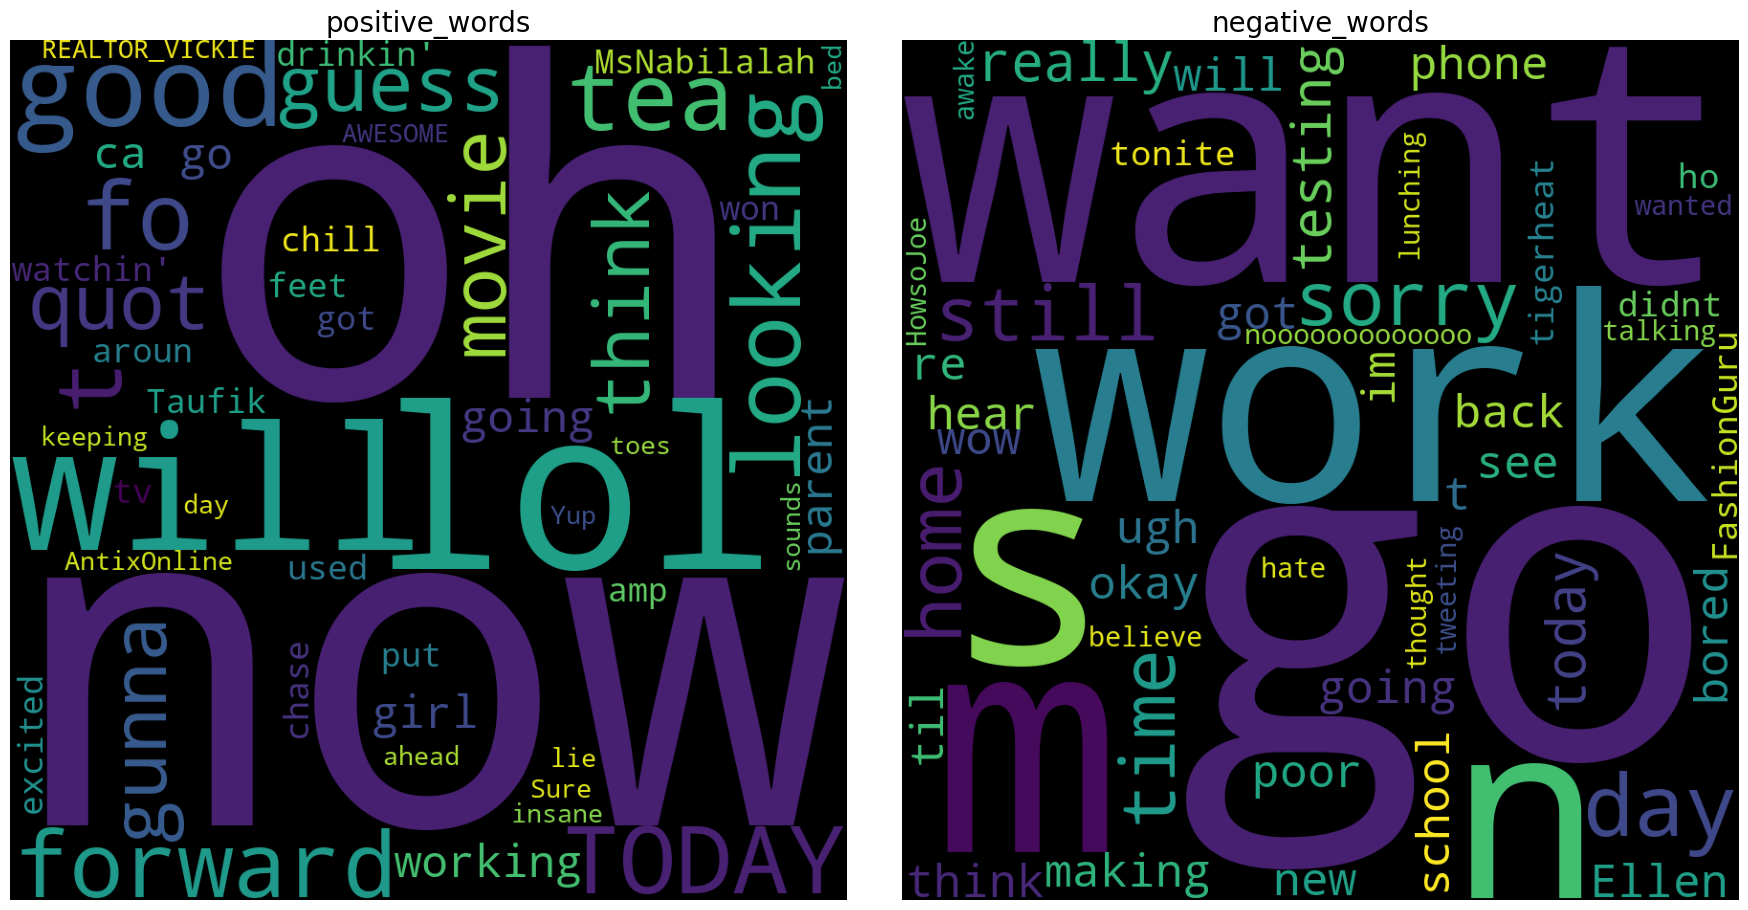

In [236]:
positive_words = df['tweet'][df['sentiment']==1]
negative_words = df['tweet'][df['sentiment']==0]
wordcloud = WordCloud(width = 875, height = 900, background_color = "black", max_words = 50, min_font_size = 20, random_state = 42)\
    .generate(str(positive_words))
wordcloud2 = WordCloud(width = 875, height = 900, background_color = "black", max_words = 50, min_font_size = 20, random_state = 42)\
    .generate(str(negative_words))

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 9), facecolor=None)
ax1.imshow(wordcloud)
ax2.imshow(wordcloud2)
ax1.set_title('positive_words', fontsize=20)
ax2.set_title('negative_words', fontsize=20)
ax1.axis("off")
ax2.axis("off")
fig.tight_layout()
plt.show()